In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt


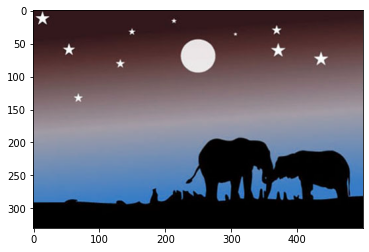

In [2]:
img = cv2.imread('C:/Users/dell/Downloads/elephant.jpg')
plt.imshow(img)
original_img =img
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.show()

In [3]:
print(img)
print(img.shape)

[[[23 19 46]
  [25 21 48]
  [28 24 51]
  ...
  [28 24 51]
  [28 24 51]
  [28 24 51]]

 [[29 25 52]
  [30 26 53]
  [30 26 53]
  ...
  [28 24 51]
  [28 24 51]
  [28 24 51]]

 [[29 25 52]
  [28 24 51]
  [27 23 50]
  ...
  [28 24 51]
  [28 24 51]
  [28 24 51]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
(330, 500, 3)


In [4]:
# Flatten each channel of the image in a linear array
all_pixels = img.reshape((330*500,3))
print(all_pixels.shape)

(165000, 3)


In [5]:
from sklearn.cluster import KMeans


In [6]:
dominant_colors = 4
km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)


KMeans(n_clusters=4)

In [7]:
centers = km.cluster_centers_
centers =np.array(centers,dtype ='uint8')
print(centers)

[[174 145 128]
 [ 38  35  64]
 [ 99  95 118]
 [  1   0   1]]


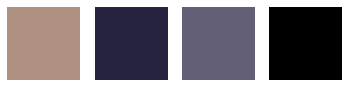

In [8]:
# Plot what all colors are these values ? 
i=1
colors =[]
for each_color in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i+=1
    colors.append(each_color)
    # color swatch
    a = np.zeros((100,100,3), dtype ='uint8')
    a[:,:,:] = each_color
    plt.imshow(a)
plt.show()

# Segmenting Original Image

In [9]:
new_img = np.zeros((330*500,3),dtype ='uint8')
print(new_img.shape)

(165000, 3)


In [10]:
a = km.labels_
print(len(a))
colors

165000


[array([174, 145, 128], dtype=uint8),
 array([38, 35, 64], dtype=uint8),
 array([ 99,  95, 118], dtype=uint8),
 array([1, 0, 1], dtype=uint8)]

In [11]:
for each_pixel in range(new_img.shape[0]):
    new_img[each_pixel] = colors[km.labels_[each_pixel]]

In [12]:
print(new_img)

[[38 35 64]
 [38 35 64]
 [38 35 64]
 ...
 [ 1  0  1]
 [ 1  0  1]
 [ 1  0  1]]


In [13]:
print(new_img.shape)

(165000, 3)


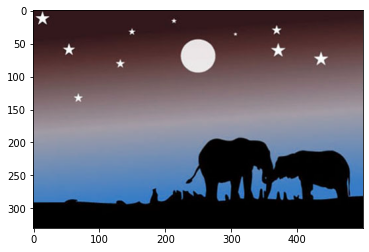

In [14]:
new_img = new_img.reshape((original_img.shape))
plt.imshow(original_img)
plt.show()

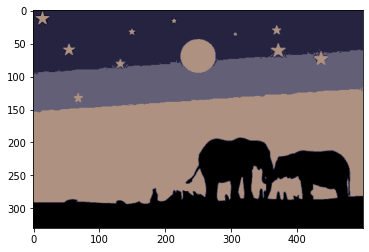

In [15]:
plt.imshow(new_img)
